In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold._t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [62]:
X = pd.read_csv('/Users/liusifan/Desktop/未命名文件夹/cdhit25_esm.csv',index_col = 'id')
X = X[X.symbol != 'na']
feature_df = X.drop(columns=['symbol'])
symbol_df = X.iloc[:,[-1]]
X_scaled = StandardScaler().fit_transform(feature_df)
ll = []
for t in symbol_df['symbol'].tolist():
    try:
        ll.append(int(t))
    except:
        ll.append(0)
symbol_df['symbol'] = ll

/Users/liusifan/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1281) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-62-347b08152486>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_df['symbol'] = ll


In [66]:
km = KMeans(n_clusters=2).fit(X_scaled)
symbol_df['scaled_cluster'] = km.labels_
# labels_为聚类完毕产生的标签值
symbol_df.sort_values('scaled_cluster')

<ipython-input-66-d6f54d6438e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_df['scaled_cluster'] = km.labels_


,symbol,scaled_cluster
id,,
CESG-GO.34554-2,0,0
MCSG-APC64114-1,1,0
NYSGRC-013977-1,0,0
NESG-YT666-2,1,0
MCSG-APC82443-1,1,0
...,...,...
MCSG-APC61409-1,1,1
JCSG-370037-1,1,1
NESG-NsR306-1,1,1


In [68]:
Counter(symbol_df['scaled_cluster'])
Counter(symbol_df['symbol'])

Counter({1: 17740, 0: 6168})

In [80]:
tp,tn,fp,fn = 0,0,0,0
for ind,row in symbol_df.iterrows():
    if row['symbol'] == 1 and row['scaled_cluster'] == 1:
        tp += 1
    if row['symbol'] == 0 and row['scaled_cluster'] == 0:
        tn += 1
    if row['symbol'] == 1 and row['scaled_cluster'] == 0:
        fn += 1
    if row['symbol'] == 0 and row['scaled_cluster'] == 1:
        fp += 1

In [83]:
tp,tn,fp,fn

(10778, 1883, 4285, 6962)

In [91]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
z = tsne.fit_transform(feature_df)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 23908 samples in 0.017s...
[t-SNE] Computed neighbors for 23908 samples in 17.020s...
[t-SNE] Computed conditional probabilities for sample 1000 / 23908
[t-SNE] Computed conditional probabilities for sample 2000 / 23908
[t-SNE] Computed conditional probabilities for sample 3000 / 23908
[t-SNE] Computed conditional probabilities for sample 4000 / 23908
[t-SNE] Computed conditional probabilities for sample 5000 / 23908
[t-SNE] Computed conditional probabilities for sample 6000 / 23908
[t-SNE] Computed conditional probabilities for sample 7000 / 23908
[t-SNE] Computed conditional probabilities for sample 8000 / 23908
[t-SNE] Computed conditional probabilities for sample 9000 / 23908
[t-SNE] Computed conditional probabilities for sample 10000 / 23908
[t-SNE] Computed conditional probabilities for sample 11000 / 23908
[t-SNE] Computed conditional probabilities for sample 12000 / 23908
[t-SNE] Computed conditional probabilities for s

In [95]:
y = tsne.fit_transform(X_scaled)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 23908 samples in 0.016s...
[t-SNE] Computed neighbors for 23908 samples in 17.455s...
[t-SNE] Computed conditional probabilities for sample 1000 / 23908
[t-SNE] Computed conditional probabilities for sample 2000 / 23908
[t-SNE] Computed conditional probabilities for sample 3000 / 23908
[t-SNE] Computed conditional probabilities for sample 4000 / 23908
[t-SNE] Computed conditional probabilities for sample 5000 / 23908
[t-SNE] Computed conditional probabilities for sample 6000 / 23908
[t-SNE] Computed conditional probabilities for sample 7000 / 23908
[t-SNE] Computed conditional probabilities for sample 8000 / 23908
[t-SNE] Computed conditional probabilities for sample 9000 / 23908
[t-SNE] Computed conditional probabilities for sample 10000 / 23908
[t-SNE] Computed conditional probabilities for sample 11000 / 23908
[t-SNE] Computed conditional probabilities for sample 12000 / 23908
[t-SNE] Computed conditional probabilities for s

In [96]:
%matplotlib
colors = np.array(['mediumslateblue','darkorange'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
fig = plt.figure(figsize = (10,10))
plt.scatter(y[:,0],y[:,1],c=colors[symbol_df['symbol']],cmap=plt.cm.Spectral,alpha = 1/5)
plt.title('t-SNE for ESM Representations',fontsize=35)
plt.ylabel('2nd Component',fontsize=25)
plt.xlabel('1nd Component',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Using matplotlib backend: MacOSX


In [110]:
def tsnekmeans(file):
    X = pd.read_csv(file,index_col = 'id')
    X = X[X.symbol != 'na']
    feature_df = X.drop(columns=['symbol'])
    symbol_df = X.iloc[:,[-1]]
    X_scaled = StandardScaler().fit_transform(feature_df)
    ll = []
    for t in symbol_df['symbol'].tolist():
        try:
            ll.append(int(t))
        except:
            ll.append(0)
    symbol_df['symbol'] = ll
    
    km = KMeans(n_clusters=2).fit(X_scaled)
    symbol_df['scaled_cluster'] = km.labels_
    symbol_df.sort_values('scaled_cluster')

    tp,tn,fp,fn = 0,0,0,0
    for ind,row in symbol_df.iterrows():
        if row['symbol'] == 1 and row['scaled_cluster'] == 1:
            tp += 1
        if row['symbol'] == 0 and row['scaled_cluster'] == 0:
            tn += 1
        if row['symbol'] == 1 and row['scaled_cluster'] == 0:
            fn += 1
        if row['symbol'] == 0 and row['scaled_cluster'] == 1:
            fp += 1
            
    metric_df = pd.DataFrame(columns=['tp','tn','fp','fn'])
    metric_df['tp'] = [tp]
    metric_df['tn'] = [tn]
    metric_df['fp'] = [fp]
    metric_df['fn'] = [fn]
    
    tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
    z = tsne.fit_transform(X_scaled)
    
    return(z,metric_df,symbol_df)

In [117]:
files = '/Users/liusifan/Desktop/未命名文件夹/cdhit_xlnet.csv'

z,metric_df,symbol_df = tsnekmeans(files)

if 'esm' in file:
    title = 't-SNE for ESM Representations'
if 'bert' in files:
    title = 't-SNE for ProtTrans_BERT Representations'
if 'xl' in files:
    title = 't-SNE for ProtTrans_XL Representations'
if 'xlnet' in files:
    title = 't-SNE for ProtTrans_XLNET Representations'

%matplotlib
colors = np.array(['mediumslateblue','darkorange'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
fig = plt.figure(figsize = (10,10))
plt.scatter(z[:,0],z[:,1],c=colors[symbol_df['symbol']],cmap=plt.cm.Spectral,alpha = 1/5)
plt.title(title,fontsize=35)
plt.ylabel('2nd Component',fontsize=25)
plt.xlabel('1nd Component',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

<ipython-input-110-974189ebfbec>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_df['symbol'] = ll
<ipython-input-110-974189ebfbec>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_df['scaled_cluster'] = km.labels_


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 22695 samples in 0.011s...
[t-SNE] Computed neighbors for 22695 samples in 15.328s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22695
[t-SNE] Computed conditional probabilities for sample 2000 / 22695
[t-SNE] Computed conditional probabilities for sample 3000 / 22695
[t-SNE] Computed conditional probabilities for sample 4000 / 22695
[t-SNE] Computed conditional probabilities for sample 5000 / 22695
[t-SNE] Computed conditional probabilities for sample 6000 / 22695
[t-SNE] Computed conditional probabilities for sample 7000 / 22695
[t-SNE] Computed conditional probabilities for sample 8000 / 22695
[t-SNE] Computed conditional probabilities for sample 9000 / 22695
[t-SNE] Computed conditional probabilities for sample 10000 / 22695
[t-SNE] Computed conditional probabilities for sample 11000 / 22695
[t-SNE] Computed conditional probabilities for sample 12000 / 22695
[t-SNE] Computed conditional probabilities for s

In [ ]:
sns.set(font='SimHei',style='ticks')
centers = symbol_df.groupby('scaled_cluster').mean().reset_index()
colors = np.array(['blue','yellow'])
plt.figure(figsize=(10,8))
plt.scatter(symbol_df['symbol'],symbol_df['scaled_cluster'],c=colors[symbol_df['scaled_cluster']],edgecolor='w',s=100)
plt.scatter(centers['symbol'],centers['scaled_cluste'],linewidths=5,marker='x',s=200, c='black')
plt.tick_params(labelsize = 13)
plt.title('K-Means')
plt.xlabel('calories')
plt.ylabel('alcohol')
sns.despine()

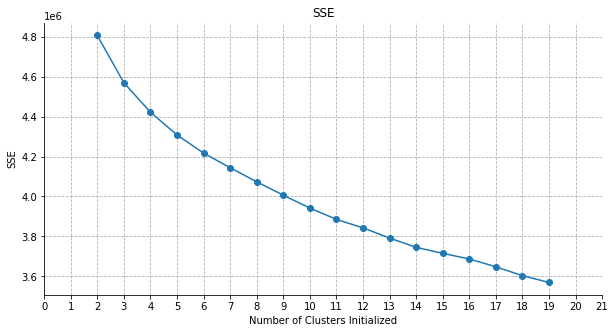

In [30]:
MSE = []
X_scaled = StandardScaler().fit_transform(X)
for k in range(2,20):
    km = KMeans(n_clusters=k)  # 构造聚类器
    km.fit(X_scaled)
    MSE.append(km.inertia_)
    
plt.figure(figsize=(10,5))   
plt.plot(range(2,20),MSE,'o-')
plt.xticks(range(0,22,1)) 
plt.grid(linestyle='--')
plt.xlabel("Number of Clusters Initialized")
plt.ylabel('SSE')
plt.title("SSE")
sns.despine()